In [1]:
import numpy as np
import pandas as pan
import matplotlib.pyplot as mat
import sklearn as sky

In [31]:
dataset=pan.read_csv('data.csv')


In [32]:
dataset['diagnosis'] = dataset['diagnosis'].apply(lambda x: 0 if x=='M' else 1)

In [33]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [34]:
y = dataset['diagnosis']
X = dataset.drop(['id','diagnosis'], axis = 1)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [36]:
dataset.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [37]:
#Linear Regression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [38]:
#Predicting Model
pred = model.predict(X_test)
y_pred1 = [ 0 if x < 0.5 else 1 for x in pred]

In [40]:
#Logistic Regression model
from sklearn.linear_model import LogisticRegression
Logmodel = LogisticRegression()
Logmodel.fit(X_train,y_train)

c:\Users\navee\OneDrive\Desktop\Mad-Lab\env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
#Predicting the model
y_pred2 = Logmodel.predict(X_test)

In [42]:
#Confusion Matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cm1= confusion_matrix(y_test,y_pred1)
cm2= confusion_matrix(y_test,y_pred2)
print("Confusin Matrix: ")
print(cm1)
print(cm2)

Confusin Matrix: 
[[45  6]
 [ 0 92]]
[[47  4]
 [ 5 87]]


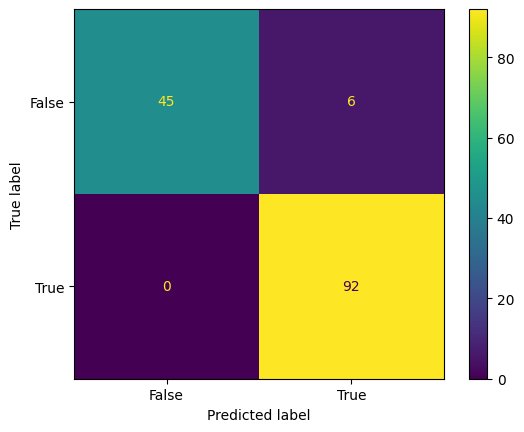

In [43]:
#Linear Regression Confusion Matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm1, display_labels =[False,True])
cm_display.plot()
mat.show()

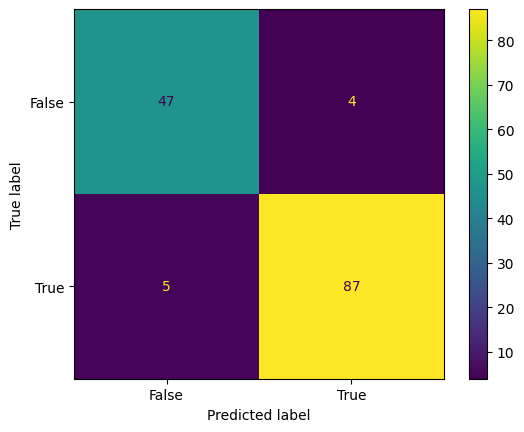

In [44]:
#Logics Regression Confusion Matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm2, display_labels =[False,True])
cm_display.plot()
mat.show()